In [1]:
from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *

import numpy as np
from PIL import Image

from pathlib import Path
import os
import random

In [2]:
PROJ_DIR = Path(os.path.abspath("")).parent
PROJ_DIR

WindowsPath('c:/Pankaj/Projects/00-Learning/Kaggle/cloud')

In [3]:
TRAIN_DIR = PROJ_DIR / "data/raw/train_images"
TRAIN_DIR

WindowsPath('c:/Pankaj/Projects/00-Learning/Kaggle/cloud/data/raw/train_images')

In [4]:
train_labels = PROJ_DIR / "data/raw"/ "train.csv"
train_labels

WindowsPath('c:/Pankaj/Projects/00-Learning/Kaggle/cloud/data/raw/train.csv')

In [5]:
with open(train_labels, 'r') as f:
    y_train = f.read()

In [6]:
y_train = y_train.split('\n')
len(y_train)

22186

### Convert the labels to dict

In [7]:
y_label_dict = {}
for img in y_train[1:-1]:
    y_label_dict[img.split(',')[0]] = img.split(',')[-1]
    
len(set([x.split('.')[0] for x in y_label_dict.keys()])) == len(os.listdir(TRAIN_DIR))

True

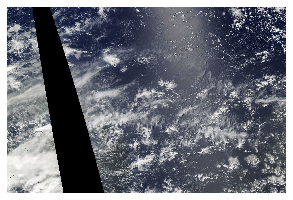

In [8]:
img_f = random.choice(os.listdir(TRAIN_DIR))
img = open_image(TRAIN_DIR / img_f)
img.show(figsize=(5, 5))

In [9]:
y_label_dict[f'{img_f.split(".")[0]}.jpg_Sugar']

''

In [10]:
cloud_class = ['Fish', 'Flower', 'Gravel', 'Sugar']
cloud_class_code = {x:cloud_class.index(x)+1 for x in cloud_class}
cloud_class_code

{'Fish': 1, 'Flower': 2, 'Gravel': 3, 'Sugar': 4}

In [11]:
img.data.shape

torch.Size([3, 1400, 2100])

## Generate Mask

In [12]:
def create_mask(img_file):
    "Given a image and class show the image with labeled pixels"

    for cld_clss in cloud_class_code:
        print(cld_clss)
        if len(y_label_dict[f"{img_file}_{cld_clss}"]) != 0:
            mask = np.zeros(img.data.shape[1] * img.data.shape[2], dtype=np.int64)

            mask_encoded = y_label_dict[f"{img_file}_{cld_clss}"]
            mask_encoded = mask_encoded.split(" ")

            for i in range(int(len(mask_encoded) / 2)):
                i_start = int(mask_encoded[2 * i])
                running_len = int(mask_encoded[2 * i + 1])

                mask[i_start : i_start + running_len] = cloud_class_code[cld_clss]

            mask = mask.reshape((img.data.shape[1], img.data.shape[2]))

    return mask

In [13]:
m1 = create_mask(img_f)

Fish
Flower
Gravel
Sugar


In [16]:
img_f

'd8a0a70.jpg'

In [17]:
i = Image.fromarray(m1, mode="L")

In [18]:
type(i)

PIL.Image.Image

WindowsPath('c:/Pankaj/Projects/00-Learning/Kaggle/cloud/data/raw/train_labels')

In [22]:
i.save(TRAIN_DIR.parent / "train_labels" / "Img1.png")